In [1]:
import pandas as pd

train = pd.read_csv('xTrainFinal.csv')
test = pd.read_csv('xTest.csv')
test.head()

,Player,Age,Team,G,GS,MP,FG,FGA,FG%,3P,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,All Star
0,Shai Gilgeous-Alexander,26,OKC,76,76,34.2,11.3,21.8,0.519,2.1,...,0.9,4.1,5.0,6.4,1.7,1.0,2.4,2.2,32.7,1
1,Giannis Antetokounmpo,30,MIL,67,67,34.2,11.8,19.7,0.601,0.2,...,2.2,9.7,11.9,6.5,0.9,1.2,3.1,2.3,30.4,1
2,Nikola Jokić,29,DEN,69,69,36.8,11.3,19.6,0.575,2.0,...,2.9,9.9,12.8,10.3,1.8,0.6,3.3,2.3,29.8,1
3,Luka Dončić,25,2TM,50,50,35.4,9.2,20.5,0.450,3.5,...,0.8,7.4,8.2,7.7,1.8,0.4,3.6,2.5,28.2,0
4,Anthony Edwards,23,MIN,78,78,36.3,9.1,20.3,0.447,4.0,...,0.8,4.9,5.7,4.5,1.1,0.6,3.2,1.9,27.4,1


In [2]:
from sklearn.preprocessing import StandardScaler


Xtrain = train.drop(columns=['Player','Team', 'All Star'])
ytrain = train['All Star']

Xtest = test.drop(columns=['Player','Team', 'All Star'])
ytest = test['All Star']

scaler = StandardScaler()
XTrainScaled = scaler.fit_transform(Xtrain)
XTestScaled = scaler.transform(Xtest)


In [3]:
Xtrain['impact'] = (Xtrain['PTS'] + Xtrain['AST'] + Xtrain['STL'] - Xtrain['TOV']) / Xtrain['MP'].replace(0, 0.1)
Xtest['impact'] = (Xtest['PTS'] + Xtest['AST'] + Xtest['STL'] - Xtest['TOV']) / Xtest['MP'].replace(0, 0.1)
XtrainSimple = Xtrain.drop(columns=['Age','G','MP','FG','FGA','FG%','3P','3PA','3P%','2P','2PA','2P%','FT','FTA','FT%','ORB','DRB'])
XtestSimple = Xtest.drop(columns=['Age','G','MP','FG','FGA','FG%','3P','3PA','3P%','2P','2PA','2P%','FT','FTA','FT%','ORB','DRB'])


print(XtrainSimple.columns)
XTrainSimpleScaled = scaler.fit_transform(XtrainSimple)
XTestSimpleScaled = scaler.transform(XtestSimple)

Index(['GS', 'eFG%', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'impact'], dtype='object')


In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

#This is my model weight I decided on
model = LogisticRegression(max_iter=5000,class_weight={0:1, 1:1})
model.fit(XTrainSimpleScaled, ytrain)
yPred = model.predict(XTestSimpleScaled)


print("Accuracy:", accuracy_score(ytest, yPred))
print(classification_report(ytest, yPred))

Accuracy: 0.9787610619469026
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       539
           1       0.82      0.69      0.75        26

    accuracy                           0.98       565
   macro avg       0.90      0.84      0.87       565
weighted avg       0.98      0.98      0.98       565



In [5]:
coefs = model.coef_[0]
relevance = {}
for i in range (len(XtrainSimple.columns)):
    relevance[XtrainSimple.columns[i]] = coefs[i]

sorted_relevance = dict(sorted(relevance.items(), key=lambda item: abs(item[1])))

print(sorted_relevance)


{'BLK': 0.1923102818414375, 'AST': 0.30958064380196687, 'TOV': 0.3124880363606635, 'PF': -0.34849204008917944, 'impact': 0.3964833979980206, 'STL': 0.42064100175520003, 'TRB': 0.5520399517470511, 'eFG%': 0.7553335232531223, 'GS': 1.1437457442579049, 'PTS': 1.7623577007708657}


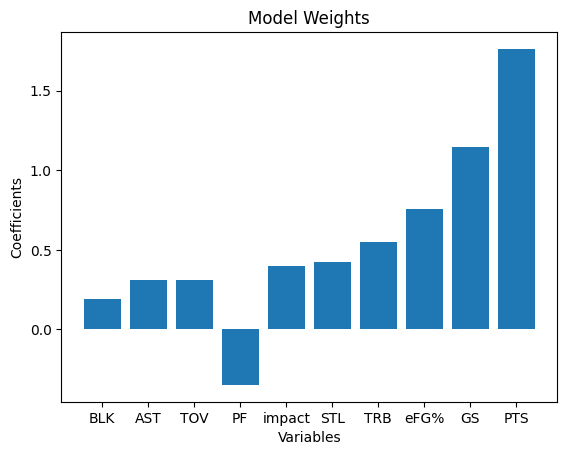

In [6]:
import matplotlib.pyplot as plt

x_labels = list(sorted_relevance.keys())
y_values = list(sorted_relevance.values())

plt.bar(x_labels, y_values)

plt.xlabel('Variables')
plt.ylabel('Coefficients')
plt.title('Model Weights')
plt.show()

In [7]:
#augment last column
test['predict'] = model.predict(XTestSimpleScaled)

for index, row in test.iterrows():
    if row['All Star'] != row['predict']:
        if row['predict']==1:
            print(row['Player'], "got snubbed")
        else:
            print(row['Player'], "is a fraud")


Luka Dončić got snubbed
Tyrese Maxey got snubbed
Devin Booker got snubbed
Kyrie Irving is a fraud
Jaylen Brown is a fraud
Jaren Jackson Jr. is a fraud
Jalen Williams is a fraud
Darius Garland is a fraud
Pascal Siakam is a fraud
Alperen Şengün is a fraud
Domantas Sabonis got snubbed
Evan Mobley is a fraud


In [8]:
print("Here was the old all star lineup")
print()

for index, row in test.iterrows():
    if row['All Star'] == 1:
        print(row['Player'])


print()
print()

print("Here is the new all star lineup")

for index, row in test.iterrows():
    if row['predict'] == 1:
        print(row['Player'])


Here was the old all star lineup

Shai Gilgeous-Alexander
Giannis Antetokounmpo
Nikola Jokić
Anthony Edwards
Jayson Tatum
Kevin Durant
Cade Cunningham
Jalen Brunson
Damian Lillard
Anthony Davis
Kyrie Irving
Stephen Curry
LeBron James
Karl-Anthony Towns
Victor Wembanyama
Trae Young
Donovan Mitchell
Tyler Herro
James Harden
Jaylen Brown
Jaren Jackson Jr.
Jalen Williams
Darius Garland
Pascal Siakam
Alperen Şengün
Evan Mobley


Here is the new all star lineup
Shai Gilgeous-Alexander
Giannis Antetokounmpo
Nikola Jokić
Luka Dončić
Anthony Edwards
Jayson Tatum
Kevin Durant
Tyrese Maxey
Cade Cunningham
Jalen Brunson
Devin Booker
Damian Lillard
Anthony Davis
Stephen Curry
LeBron James
Karl-Anthony Towns
Victor Wembanyama
Trae Young
Donovan Mitchell
Tyler Herro
James Harden
Domantas Sabonis


In [20]:
#how to check the scaled values of everything
playerBool = test['Player'] == 'Domantas Sabonis'
playerScaledVals = XTestScaled[playerBool][0]
Player = {}
for i in range (len(XtrainSimple.columns)):
    Player[XtrainSimple.columns[i]] = playerScaledVals[i]
 
for key, value in Player.items():
    print(f"{key}: {value}")
    print()


GS: 0.5363184405995475
eFG%: 0.9362537907876437
TRB: 1.8079924324047678
AST: 1.6456026094792389
STL: 1.870941602305533
BLK: 1.2277227802876263
TOV: 1.215646680142219
PF: -0.029943076889390473
PTS: -0.19810913167645622
impact: 0.7180254271157446
